<a href="https://colab.research.google.com/github/AnnaShtyn/python_for_hw_tasks/blob/main/HW_Anna_Shtyn_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('drive/MyDrive/yulu_bike_sharing_dataset.csv')

In [69]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [70]:
# ДОдамо колонку weather_season_india
def ind_season(val):
  if val in [12, 1, 2]:
    return 1
  elif val in [3, 4, 5]:
    return 2
  elif val in [6, 7, 8, 9]:
    return 3
  elif val in [10, 11]:
    return 4

df['weather_season_india'] = df['month'].apply(ind_season)

In [82]:
df
#  В наборі 10886 рядків та 20 колонок (+1 колонка після створення weather_season_india)
# В рядку є накопичувальні дані за кожну годину протягом 2 років.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,weather_season_india
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19,1
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20,1
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21,1


## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


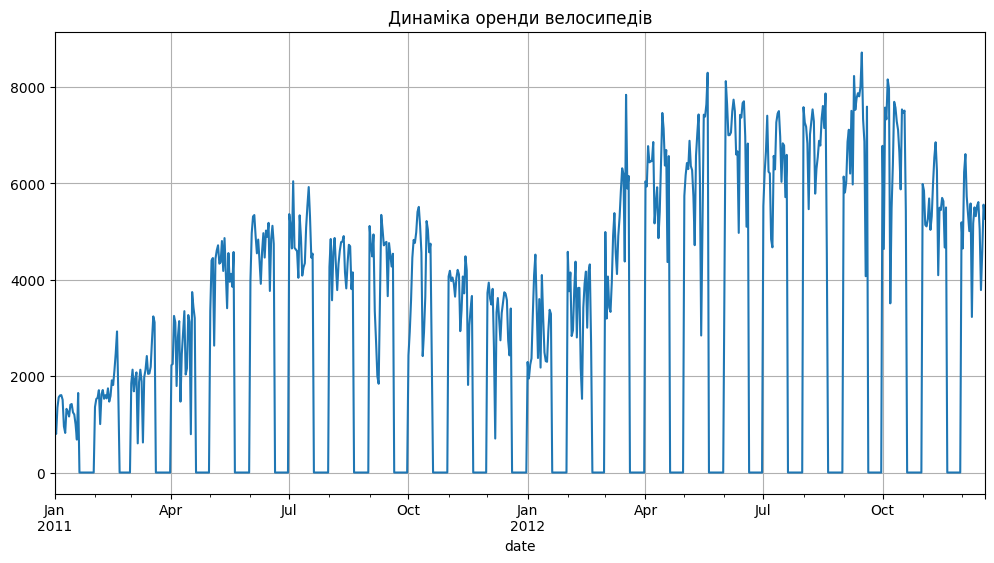

In [72]:
res_count_by_day = df['count'].resample('D').sum()

res_count_by_day.plot(
    kind='line',
    figsize=(12, 6),
    title= "Динаміка оренди велосипедів",
    grid=True,
    xlabel='date'
);

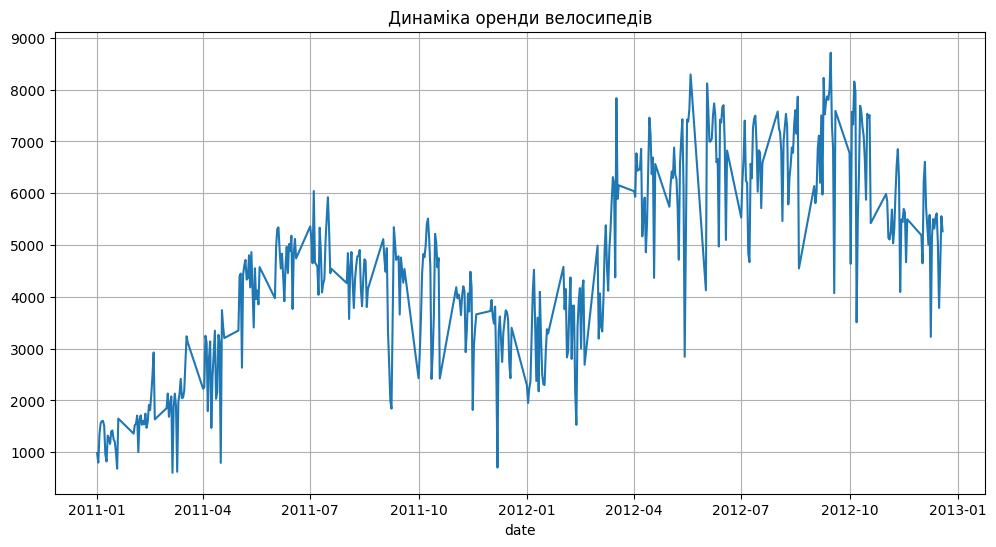

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64 date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 456, dtype: int64


In [73]:
# 1.Графік має "заломи", оскільки метод resample показує також і пропущені дані як 0 за вказаний період.
# для підтвердження цього, нижче побудуємо аналогічний графік використовуючи метод groupby та виведемо 2 змінні для порівняння
# як бачимо в колонках різна к-сть рядків, тобто днів (719 vs 456)

gr_count_by_day = df.groupby('date')['count'].sum()
gr_count_by_day.plot(
    kind='line',
    figsize=(12, 6),
    title= "Динаміка оренди велосипедів",
    grid=True,
    xlabel='date'
)
plt.show()

print(res_count_by_day, gr_count_by_day)

# 2. Тенденція протягом року нагадує синусоїду
# 3.Як бачимо, попит на оренду великів зростає протягом весни, пік оренди припадає на літо, а далі стабільний спад до зимового періоду,  що є логічним.
# Також, бачимо загалом к-сть бронювань в 2012 році збільшилась, що, ймовірно, зумовлено популяризацією сервісу.
# 4. Так, є пертурбації, навіть протягом 1 місяця. Причини треба дослідити детальніше.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

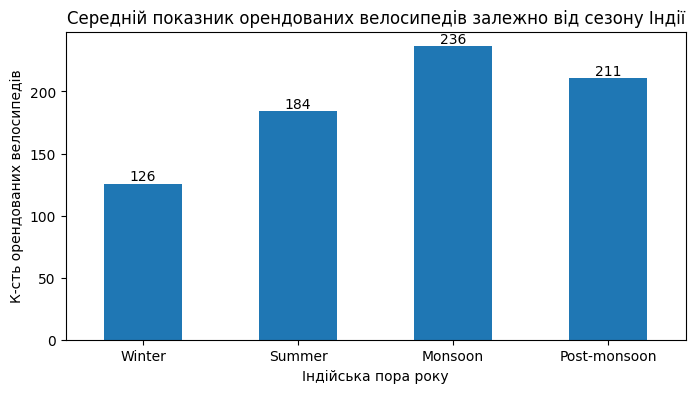

In [74]:
# Для релевантніших результатів побудуємо графік на основі відповідних індійських сезонів

india_season_mean_count = df.groupby('weather_season_india')['count'].mean()

ismc = india_season_mean_count.plot.bar(
    figsize = (8, 4),
    title = 'Середній показник орендованих велосипедів залежно від сезону Індії',
    ylabel = 'К-сть орендованих велосипедів',
    xlabel = 'Індійська пора року',
);

ismc.set_xticklabels(['Winter', 'Summer', 'Monsoon','Post-monsoon'])
plt.xticks(rotation = 360)
ismc.bar_label(ismc.containers[0], fmt='%.0f');

# 1.Найбільший середній показник орендованих великів в період "Monsoon" (6-9 міс).
# 2.Це переважно літні місяці, з рясними опадами в Індії, тому припускаємо, що логічно користувачам необхідно скоротити час переміщення на вулиці.
# 3. 1,87(показник сезону "Winter" менший майже вдвічі).

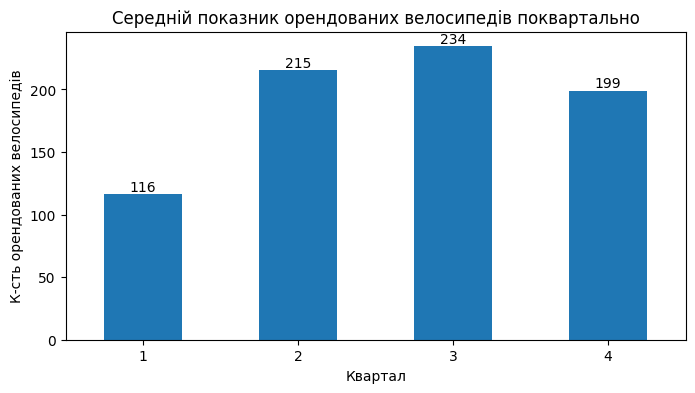

In [75]:
# Для порівняння побудуємо аналогічну діаграму, лише за календарними кварталами.

quarter_mean_count = df.groupby('season')['count'].mean()

qmc = quarter_mean_count.plot.bar(
    figsize = (8, 4),
    title = 'Середній показник орендованих велосипедів поквартально',
    ylabel = 'К-сть орендованих велосипедів',
    xlabel = 'Квартал',
);

plt.xticks(rotation = 360)
qmc.bar_label(qmc.containers[0], fmt='%.0f');

# як бачимо показники 2 графіків незначно відрізняються, тенденція однакова, але показники 1го та 3го кварталів відрізняються вдвічі.


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


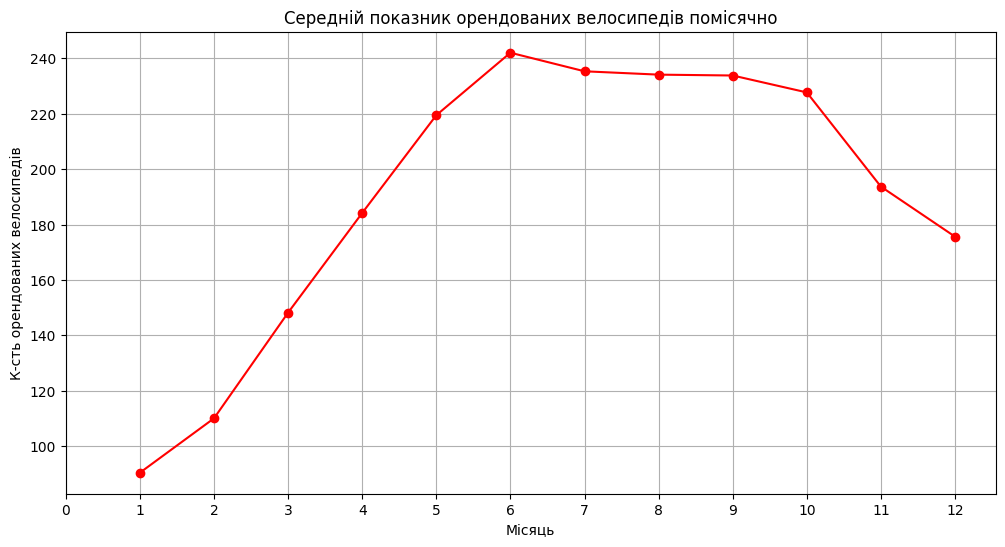

In [76]:
mean_count_by_month = df.groupby('month')['count'].mean()
mean_count_by_month.plot.line(
    figsize=(12, 6),
    marker='o',
    color='red',
    xlabel='Місяць',
    ylabel='К-сть орендованих велосипедів',
    title='Середній показник орендованих велосипедів помісячно',
    grid=True
)
plt.xticks(range(13));

# 1.Пік оренди припадає на червень-вересень, а спад - на листопад-січень.
# 2.Так
# 3.Температурні умови прямо корелюють з к-стю орендованого велотранспорту.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

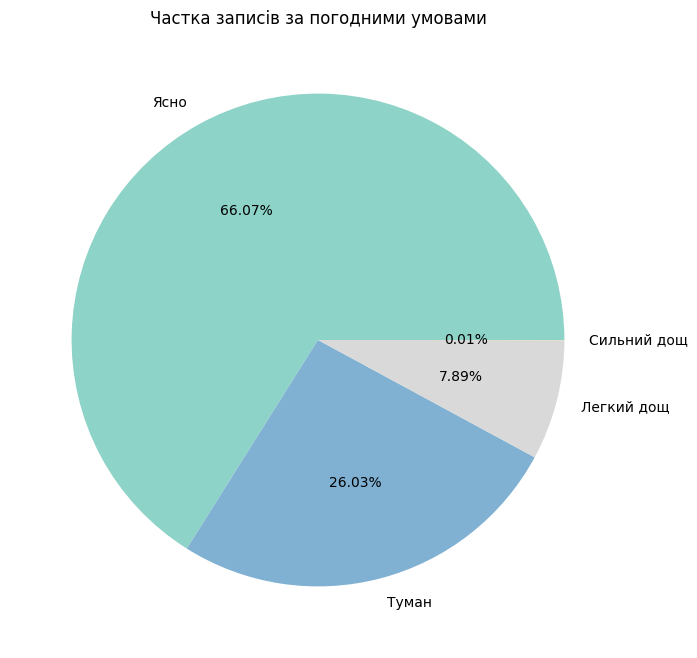

In [77]:
weather_dist = df.groupby('weather').size()

weather_dist.plot.pie(
    figsize=(8, 8),
    autopct = '%1.2f%%',
    colormap='Set3',
    title='Частка записів за погодними умовами',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
);

# 1.Переважає частка ясної погоди.
# 2.Є всього 1 запис з сильним дощем з 10886, його частка мізерна 0,01%.
# 3.Думаю, погодні умови впливають на попит оренди, оскільки в туманну погоду наврядчи хтось захоче їздити на велосипеді, а от в ясну погоду - залюбки.

Очікуваний результат:

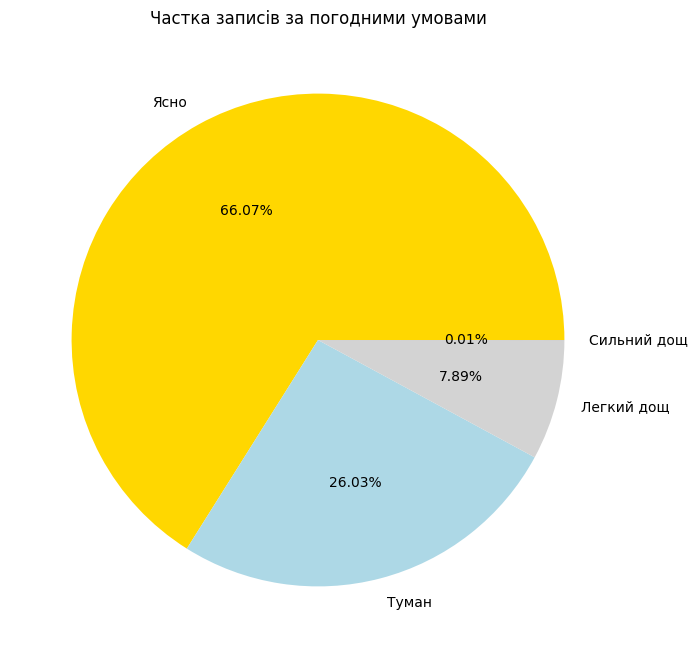

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

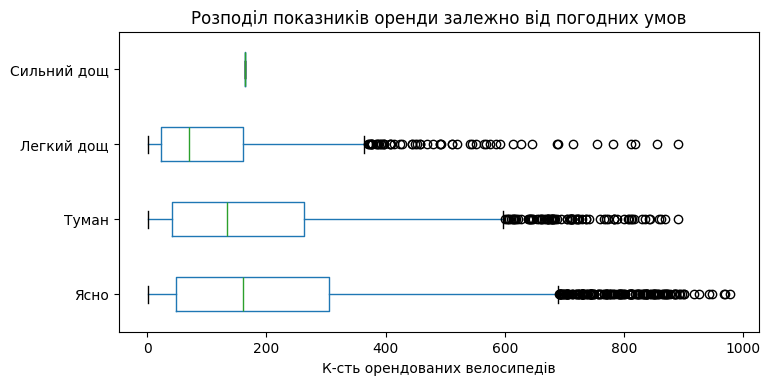

In [78]:
df.boxplot(
    column='count',
    by='weather',
    figsize=(8,4),
    grid=False,
    vert=False
)
plt.title('Розподіл показників оренди залежно від погодних умов')
plt.suptitle('')
plt.ylabel('')
plt.xlabel('К-сть орендованих велосипедів')
plt.yticks([1, 2, 3, 4], ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
plt.show()

# 1.Найбільший розкид даних оренди при ясній (1) погоді.
# 2.Викиди є при ясній, туманній, та легкому дощі погоді (1-3). У даних при сильному дощі викидів апріорі немає, оскільки є лише 1 запис.
# 3.При ясній (1) погоді. Показник оренди при сильному дощі ми не враховуємо, оскільки за недостачею даних він є і медіаною, і середнім, і модою.


## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

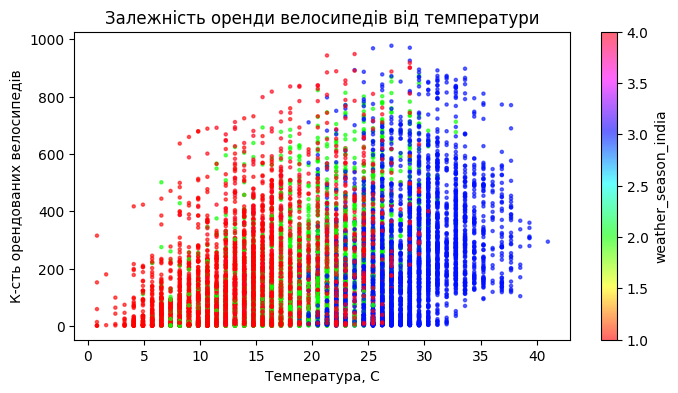

In [79]:
from matplotlib import colormaps
df.plot.scatter(
    x='temp',
    y='count',
    c='weather_season_india',
    s=5,
    figsize=(8, 4),
    colormap='hsv',
    alpha=0.6
)
plt.title('Залежність оренди велосипедів від температури')
plt.xlabel('Температура, С')
plt.ylabel('К-сть орендованих велосипедів');

# так, є пряма кореляція між збільшенням температури та зростанням числа оренди, проте до деякої межі - після перевищення 30С к-сть оренд спадає, а за 40С практично відсутні дані.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

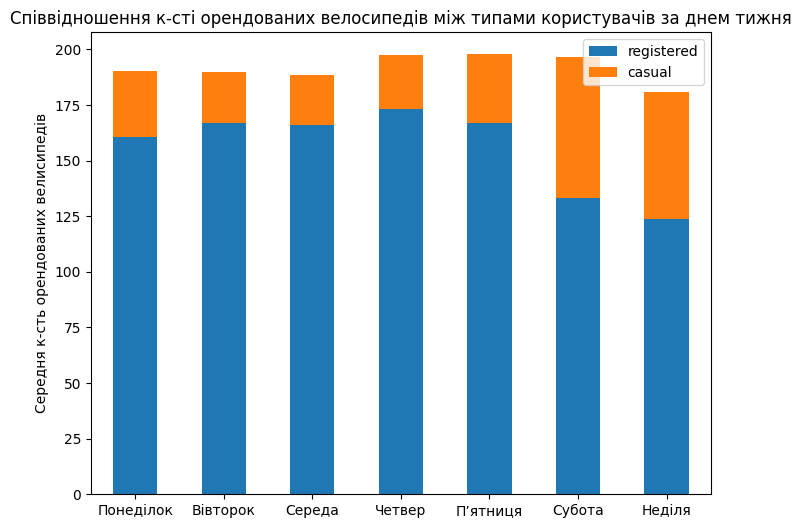

In [80]:
ax = df.groupby(df.index.weekday)[['registered','casual']].mean().plot.bar(
    figsize=(8,6),
    title='Cпіввідношення к-сті орендованих велосипедів між типами користувачів за днем тижня',
    xlabel='',
    ylabel='Середня к-сть орендованих велисипедів',
    stacked=True
)
ax.set_xticklabels(['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя'])
plt.xticks(rotation = 360);

# 1.Більше зареєстровані користувачі орендують переважно в будні.
# 2.Мені здається що переважна частина зареєстрованих користувачів - працівники, або ж учні чи студенти,
# вони є постійними клієнтами, які в будні таким чином добираються до місця роботи/навчання та назад.
# А більше поїздок від випадкових юзерів у вихідні є спонтанними, та разовими, що не потребують постійної реєстрації на сайті.